In [108]:
import matplotlib.pyplot as plt
import numpy as np
import rabi_box as rb

from qutip import *

%matplotlib inline
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['mathtext.rm'] = 'dejavuserif'
plt.rcParams['mathtext.it'] = 'dejavuserif'

In [109]:
# rabi params

# det is wc - wa
det = 0
wc = rb.omega_nm(2,1,1)  # cavity frequency
wa = wc - det  # atom frequency

lamb  = 10.  # coupling strength
N = 5              # number of cavity fock states

In [110]:
# hamiltonian

a = tensor(destroy(N),qeye(2))       # tensor(a,b) is tensor product between a and b
sig_m = tensor(qeye(N),destroy(2))   # queye(n) is n-th identity op, destroy(n) is n-th destroy op

sig_3 = sig_m.dag()*sig_m - sig_m*sig_m.dag()  # dag() -> dagger


H0 = 0.5*wa*sig_3 + wc*a.dag()*a #+ lamb*(sig_m.dag() + sig_m)*(a + a.dag())
H_prime = lamb*(sig_m.dag() + sig_m)*(a + a.dag())
H_prime_rwa = lamb*(a.dag() * sig_m + a * sig_m.dag()) 

H = [H0,H_prime]
H_rwa = [H0,H_prime_rwa]

In [111]:
H0

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-7.4022033   0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          7.4022033   0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          7.4022033   0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         22.2066099   0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         22.2066099   0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         37.0110165
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  37.0110165   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.     

In [112]:
# get eigensates and eigenvals

eig_vals,eig_states = H0.eigenstates()
psi_0 = eig_states[3]  # initial state is grond state

psi_0

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [113]:
# TDSE solution
t_f = 4*2*np.pi/lamb/np.sqrt(2)
t_steps = 1000
t = np.linspace(0,t_f,t_steps)

result = sesolve(H,psi_0,t)
result_rwa = sesolve(H_rwa,psi_0,t)
print(t_f)

1.7771531752633463


In [114]:
state_t_np = np.array([psi_t.full() for psi_t in result.states])
state_t_np_rwa = np.array([psi_t.full() for psi_t in result_rwa.states])

# get transition probability on each eigstate at each time step
probs_rabi_quant = (abs(state_t_np)**2).reshape(t_steps,-1).T
probs_rwa_quant = (abs(state_t_np_rwa)**2).reshape(t_steps,-1).T

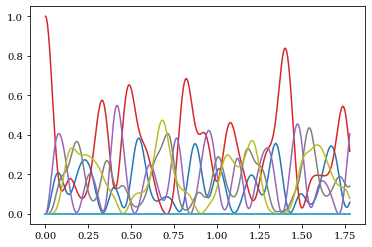

In [115]:
fig,ax = plt.subplots()

for prob in probs_rabi_quant:
    ax.plot(t,prob)
    
# ax.plot(t,[pe-pg for pe,pg in zip(probs[1],probs[2])])
# ax.plot(t,[pe-pg for pe,pg in zip(probs_rwa[1],probs_rwa[2])])

In [124]:
import rabi_box as rb

d = rb.x_nm(1,2,1)
n = 1

In [125]:
Estr = 'E0*exp(1j*omega*t)/2'
args = dict(omega = rb.omega_nm(2,1,1),  # frequency
            E0    = 2*lamb*np.sqrt(n+1)/d)  # peak amplitude (μ·E0)

Estr_dag = 'E0*exp(-1j*omega*t)/2'
args = dict(omega = rb.omega_nm(2,1,1),  # frequency
            E0    = 2*lamb*np.sqrt(n+1)/d)  # peak amplitude (μ·E0)

Estr_rabi = 'E0*cos(omega*t)'
args = dict(omega = rb.omega_nm(2,1,1),  # frequency
            E0    = 2*lamb*np.sqrt(n+1)/d)  # peak amplitude (μ·E0)

In [126]:
sig_m = destroy(2)   # queye(n) is n-th identity op, destroy(n) is n-th destroy op

sig_3 = sig_m.dag()*sig_m - sig_m*sig_m.dag()  # dag() -> dagger

omega_0 = rb.omega_nm(2,1,1)

H0 = 0.5*omega_0*sig_3
H_prime_1 = d*sig_m
H_prime_2 = d*sig_m.dag()
H_prime_rabi = d*(sig_m + sig_m.dag())

H = [H0,[H_prime_1,Estr],[H_prime_2,Estr_dag]]
H_rabi = [H0,[H_prime_rabi,Estr_rabi]]

args['E0'],omega_0

(157.0244444918748, 14.804406601634037)

In [127]:
H0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-7.4022033  0.       ]
 [ 0.         7.4022033]]

In [128]:
eig_vals,eig_states = H0.eigenstates()
psi_0 = eig_states[1]  # initial state is grond state

psi_0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [129]:
t_f = 4*2*np.pi/lamb/np.sqrt(2)
t_steps = 1000
t = np.linspace(0,t_f,t_steps)

result = sesolve(H,psi_0,t,args=args)
result_rabi = sesolve(H_rabi,psi_0,t,args=args)
print(t_f)

1.7771531752633463


In [130]:
state_t_np_rwa = np.array([psi_t.full() for psi_t in result.states])
state_t_np_rabi = np.array([psi_t.full() for psi_t in result_rabi.states])

# get transition probability on each eigstate at each time step
probs_rwa = (abs(state_t_np_rwa)**2).reshape(t_steps,-1).T
probs_rabi = (abs(state_t_np_rabi)**2).reshape(t_steps,-1).T

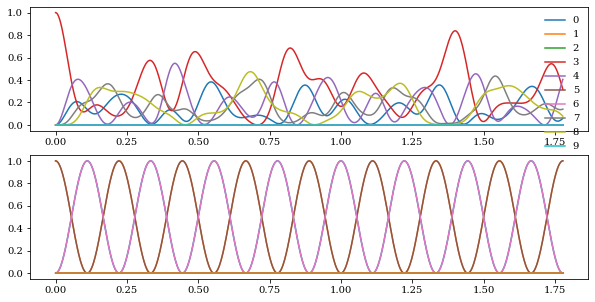

In [131]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))

# for prob in probs_rabi:
#     ax[0].plot(t,prob)

count = 0
for prob in probs_rabi_quant:
    ax[0].plot(t,prob,label="{}".format(count))
    count += 1
ax[0].legend(frameon=False)
    
for prob in probs_rwa:
    ax[1].plot(t,prob)
    
for prob in probs_rwa_quant:
    ax[1].plot(t,prob)
    
# ax.plot(t,[pe-pg for pe,pg in zip(probs[1],probs[2])])
# ax.plot(t,[pe-pg for pe,pg in zip(probs_rwa[0],probs_rwa[1])])